## Observations and Insights


1. Ramicane and Capomulin show the most promise from these findings
2. Infubinol and Ceftamin show promise when compared to Placebo results
3. Outlier in Infubinol resulted from subject not lasting after timepoint 5.
4. Most mouses with successful trial of tumor volume reduction using Capomulin usually results in increase in tumor volume initially with significant decrease in further timepoints 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groups = combined_df.groupby(['Drug Regimen'])
regimen_mean = regimen_groups['Tumor Volume (mm3)'].mean()
regimen_median = regimen_groups['Tumor Volume (mm3)'].median()
regimen_variance = regimen_groups['Tumor Volume (mm3)'].var()
regimen_std = regimen_groups['Tumor Volume (mm3)'].std()
regimen_sem = regimen_groups['Tumor Volume (mm3)'].sem()

regimen_summary_df = pd.DataFrame({"Mean": regimen_mean,
                                   "Median": regimen_median,
                                   "Variance": regimen_variance,
                                   "Standard Deviation": regimen_std,
                                   "SEM": regimen_sem
                                  })
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Count')

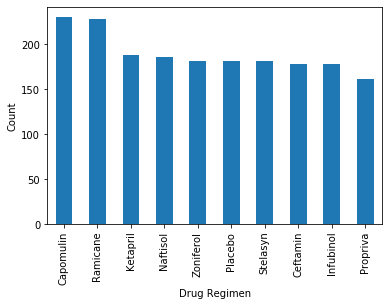

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_counts = combined_df["Drug Regimen"].value_counts()

bar_plot = regimen_counts.plot(kind="bar")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Count")


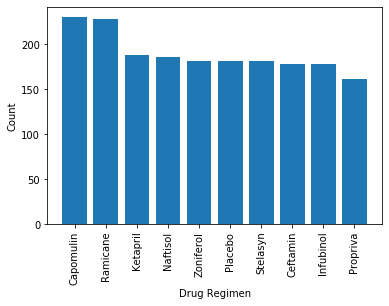

<Figure size 432x288 with 0 Axes>

In [4]:
# # Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen_names = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']

regimen_counts = []

for drug in regimen_names:
    regimen_counts.append(combined_df.loc[combined_df["Drug Regimen"] == drug, "Drug Regimen"].count())

# Set x axis and tick locations
x_axis = np.arange(len(regimen_names))
tick_locations = [value for value in x_axis]    

plt.bar(x_axis, regimen_counts)
plt.xticks(tick_locations, regimen_names, rotation="vertical")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

## Pie plots

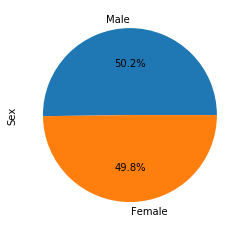

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = mouse_metadata["Sex"].value_counts()

pie_plot = sex_counts.plot(kind="pie",autopct='%1.1f%%')

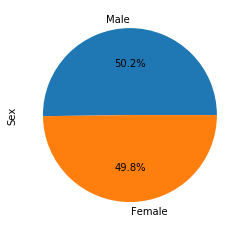

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_names = mouse_metadata["Sex"].unique()

sex_counts = []

for i in sex_names:
    sex_counts.append(mouse_metadata.loc[mouse_metadata["Sex"] == i, "Sex"].count())

plt.pie(sex_counts, labels=sex_names,
        autopct="%1.1f%%",)    
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
mouse_names = mouse_metadata["Mouse ID"]

mouse_treatment = mouse_metadata["Drug Regimen"]

mouse_final_timepoint = []

for i in mouse_names:
    mouse_final_timepoint.append(combined_df.loc[combined_df["Mouse ID"] == i, "Timepoint"].max())

mouse_final_tumor_volume = []

for i in range(0,len(mouse_names)):
    mouse_tp_vol = combined_df.loc[combined_df["Mouse ID"] == mouse_names[i], ["Timepoint","Tumor Volume (mm3)"]]
    mouse_final_tumor_volume.append(mouse_tp_vol.loc[mouse_tp_vol["Timepoint"] == mouse_final_timepoint[i], "Tumor Volume (mm3)"].min())


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#len(mouse_treatment)

final_volume_df = pd.DataFrame(
    {'Mouse ID': mouse_names,
     'Drug Regimen': mouse_treatment,
     'Timepoint': mouse_final_timepoint,
     'Tumor Volume': mouse_final_tumor_volume     
    })

final_volume_df

final_volume_regimen_groups = final_volume_df.groupby(['Drug Regimen'])



regimen_names = ['Ramicane','Capomulin','Infubinol','Ceftamin']
regimen_names

for name in regimen_names:
    final_regimen_df = final_volume_df.loc[final_volume_df["Drug Regimen"] == name,"Tumor Volume"]
    quartiles = final_regimen_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(name)
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")


Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of Tumor

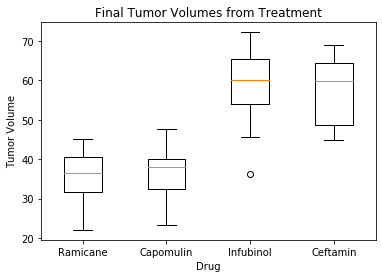

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

four_regimens = ['Ramicane','Capomulin','Infubinol','Ceftamin']

df1 = final_volume_df.loc[final_volume_df["Drug Regimen"] == four_regimens[0],"Tumor Volume"]
df2 = final_volume_df.loc[final_volume_df["Drug Regimen"] == four_regimens[1],"Tumor Volume"]
df3 = final_volume_df.loc[final_volume_df["Drug Regimen"] == four_regimens[2],"Tumor Volume"]
df4 = final_volume_df.loc[final_volume_df["Drug Regimen"] == four_regimens[3],"Tumor Volume"]
    
    
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes from Treatment')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug')
ax1.boxplot([df1,df2,df3,df4], labels=four_regimens)
plt.show()



## Line and scatter plots

Text(0.5, 1.0, 'Capomulin Treatment of mouse l509')

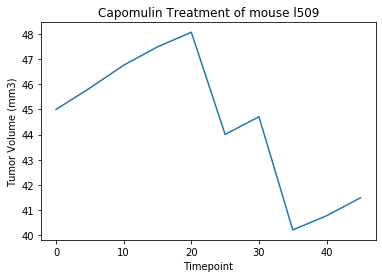

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse_df = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == 'Capomulin',:]

capmouses = capomulin_mouse_df["Mouse ID"].reset_index(drop=True)

#selected_mouse = random.randrange(0, len(capmouses))

selected_mouse_df = combined_df.loc[combined_df["Mouse ID"] == 'l509', :]

line_timepoint = selected_mouse_df["Timepoint"]
line_tumor = selected_mouse_df["Tumor Volume (mm3)"]

plt.plot(line_timepoint, line_tumor)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of mouse l509")

In [10]:
# import random
# # Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# capomulin_mouse_df = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == 'Capomulin',:]

# capmouses = capomulin_mouse_df["Mouse ID"].reset_index(drop=True)

# selected_mouse = random.randrange(0, len(capmouses))

# selected_mouse_df = combined_df.loc[combined_df["Mouse ID"] == capmouses[selected_mouse], :]

# line_timepoint = selected_mouse_df["Timepoint"]
# line_tumor = selected_mouse_df["Tumor Volume (mm3)"]

# plt.plot(line_timepoint, line_tumor)
# plt.xlabel("Timepoint")
# plt.ylabel("Tumor Volume (mm3)")
# plt.title(f"Capomulin Treatment of mouse {capmouses[selected_mouse]}")

Text(0, 0.5, 'Tumor Volume (mm3)')

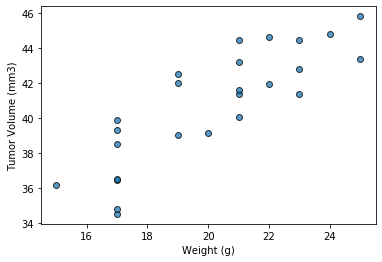

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capmouses = capomulin_mouse_df["Mouse ID"]
capweights = capomulin_mouse_df["Weight (g)"]
captumvol = []

capomulin_mouse_df = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == 'Capomulin',:]

for mouse in capmouses:
    captumvol.append(combined_df.loc[combined_df["Mouse ID"] == mouse, "Tumor Volume (mm3)"].mean())

captumvol

plt.scatter(capweights, captumvol, marker="o", edgecolors="black",
            alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


The correlation between mouse weight and average tumor volume is 0.84


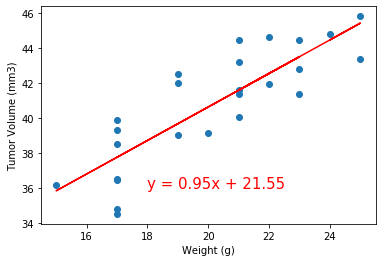

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
#average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capweights,captumvol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


# Add the linear regression equation and line to plot
x_values = capweights
y_values = captumvol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()